Deep Learning using Rectified Linear Units
===

## Overview

In this notebook, we explore the performance of a neural net with varying activation functions on an image classification task.

We load our dependencies.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from neural_net import NeuralNet, loss_fn, train_step, train

We set up the GPU memory growth.

In [2]:
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

We set the random seeds for reproducibility.

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

We set the batch size, the number of epochs, and the number of units per layer.

In [4]:
batch_size = 1024
epochs = 300
neurons = [512, 512]

## Data Preparation

We load the MNIST dataset.

In [5]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()

We scale the images.

In [6]:
train_features = train_features.astype('float32').reshape(-1, 784) / 255.
test_features = test_features.astype('float32').reshape(-1, 784) / 255.

We one-hot encode labels.

In [7]:
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

We create a `tf.data.Dataset` object for the training dataset.

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
dataset = dataset.prefetch(4096).shuffle(2048).batch(batch_size, True)

## Model

We use a `NeuralNet` class that consists of two hidden layers.

### Logistic-based Model

We define a 2-layer NN with Logistic activation function.

In [13]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.sigmoid,
    initializer='glorot_uniform',
    num_classes=10
)

We train our model for 300 epochs.

In [14]:
logistic_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 124.78715515136719, mean accuracy = 0.5058088898658752
epoch 100/300 : mean loss = 108.74727630615234, mean accuracy = 0.6294618844985962
epoch 150/300 : mean loss = 83.38184356689453, mean accuracy = 0.707671046257019
epoch 200/300 : mean loss = 62.34834671020508, mean accuracy = 0.7648673057556152
epoch 250/300 : mean loss = 49.619140625, mean accuracy = 0.8005455136299133
epoch 300/300 : mean loss = 41.73159408569336, mean accuracy = 0.8244208097457886


We produce predictions for the test data.

In [15]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [16]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [17]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.8299999833106995


### TanH-based Model

We define a 2-layer NN with Hyperbolic Tangent activation function.

In [18]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.tanh,
    initializer='glorot_uniform',
    num_classes=10
)

We train our model for 300 epochs.

In [19]:
tanh_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 24.030454635620117, mean accuracy = 0.8835533261299133
epoch 100/300 : mean loss = 19.89619255065918, mean accuracy = 0.9019059538841248
epoch 150/300 : mean loss = 18.146024703979492, mean accuracy = 0.9111664891242981
epoch 200/300 : mean loss = 17.04576873779297, mean accuracy = 0.9159314632415771
epoch 250/300 : mean loss = 16.290496826171875, mean accuracy = 0.920073390007019
epoch 300/300 : mean loss = 15.572500228881836, mean accuracy = 0.9240975379943848


We produce predictions for the test data.

In [20]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [21]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [22]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9261000156402588


### ReLU-based Model

We define a 2-layer NN with ReLU activation function.

In [23]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.relu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [24]:
relu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 23.05595588684082, mean accuracy = 0.8884530067443848
epoch 100/300 : mean loss = 17.472089767456055, mean accuracy = 0.9136247038841248
epoch 150/300 : mean loss = 14.95518684387207, mean accuracy = 0.9267914891242981
epoch 200/300 : mean loss = 13.292386054992676, mean accuracy = 0.9347891807556152
epoch 250/300 : mean loss = 11.981569290161133, mean accuracy = 0.9421639442443848
epoch 300/300 : mean loss = 10.967140197753906, mean accuracy = 0.9465247988700867


We produce predictions for the test data.

In [25]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [26]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [27]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9467999935150146


### Leaky ReLU-based Model

We define a 2-layer NN with Leaky ReLU activation function.

In [28]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.leaky_relu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [29]:
lrelu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 22.97422218322754, mean accuracy = 0.8874764442443848
epoch 100/300 : mean loss = 18.12353515625, mean accuracy = 0.9108970761299133
epoch 150/300 : mean loss = 15.909416198730469, mean accuracy = 0.9214877486228943
epoch 200/300 : mean loss = 14.447744369506836, mean accuracy = 0.9297885298728943
epoch 250/300 : mean loss = 13.200448989868164, mean accuracy = 0.9359509944915771
epoch 300/300 : mean loss = 12.268448829650879, mean accuracy = 0.9409347772598267


We produce predictions for the test data.

In [30]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [31]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [32]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9426000118255615


### Softplus-based Model

We define a 2-layer NN with Softplus activation function.

In [33]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.softplus,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [34]:
softplus_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 28.1346435546875, mean accuracy = 0.8667833805084229
epoch 100/300 : mean loss = 21.805683135986328, mean accuracy = 0.8922750353813171
epoch 150/300 : mean loss = 19.646066665649414, mean accuracy = 0.9025794863700867
epoch 200/300 : mean loss = 18.42160415649414, mean accuracy = 0.9086240530014038
epoch 250/300 : mean loss = 17.611276626586914, mean accuracy = 0.9133384823799133
epoch 300/300 : mean loss = 16.993457794189453, mean accuracy = 0.9167227745056152


We produce predictions for the test data.

In [35]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [36]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [37]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.919700026512146


### ELU-based Model

We define a 2-layer NN with ELU activation function.

In [38]:
model = NeuralNet(
    units=neurons,
    activation=tf.nn.elu,
    initializer='he_normal',
    num_classes=10
)

We train our model for 300 epochs.

In [39]:
elu_performance = train(model, loss_fn, dataset, epochs=epochs)

epoch 50/300 : mean loss = 22.24932098388672, mean accuracy = 0.8918709754943848
epoch 100/300 : mean loss = 18.477754592895508, mean accuracy = 0.9094322323799133
epoch 150/300 : mean loss = 16.749286651611328, mean accuracy = 0.9178845882415771
epoch 200/300 : mean loss = 15.587139129638672, mean accuracy = 0.9242995977401733
epoch 250/300 : mean loss = 14.592337608337402, mean accuracy = 0.9289803504943848
epoch 300/300 : mean loss = 13.772987365722656, mean accuracy = 0.932953953742981


We produce predictions for the test data.

In [40]:
predictions = tf.nn.softmax(model(test_features))

We compute the test accuracy.

In [41]:
accuracy = tf.metrics.Accuracy()
test_accuracy = accuracy(tf.argmax(predictions, 1), tf.argmax(test_labels, 1))

Check for the test accuracy.

In [42]:
print('Test accuracy : {}'.format(test_accuracy.numpy()))

Test accuracy : 0.9355999827384949


## Training Performance

We lay down the training performance of each model.

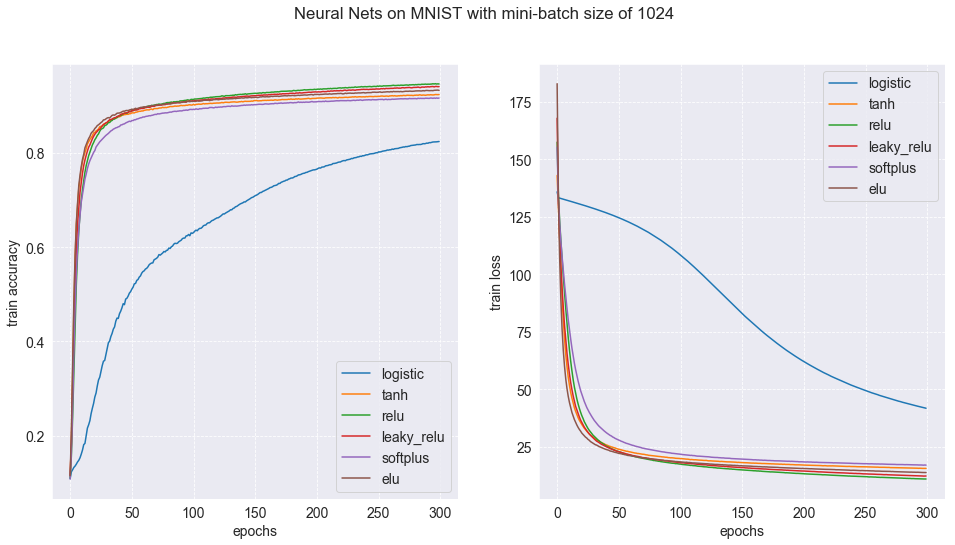

In [43]:
sns.set_style('dark', {'grid.linestyle': '--'})
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})

plt.subplot(121)
plt.plot(range(len(logistic_performance[0])), logistic_performance[0], label='logistic')
plt.plot(range(len(tanh_performance[0])), tanh_performance[0], label='tanh')
plt.plot(range(len(relu_performance[0])), relu_performance[0], label='relu')
plt.plot(range(len(lrelu_performance[0])), lrelu_performance[0], label='leaky_relu')
plt.plot(range(len(softplus_performance[0])), softplus_performance[0], label='softplus')
plt.plot(range(len(elu_performance[0])), elu_performance[0], label='elu')
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(122)
plt.plot(range(len(logistic_performance[1])), logistic_performance[1], label='logistic')
plt.plot(range(len(tanh_performance[1])), tanh_performance[1], label='tanh')
plt.plot(range(len(relu_performance[1])), relu_performance[1], label='relu')
plt.plot(range(len(lrelu_performance[1])), lrelu_performance[1], label='leaky_relu')
plt.plot(range(len(softplus_performance[1])), softplus_performance[1], label='softplus')
plt.plot(range(len(elu_performance[1])), elu_performance[1], label='elu')
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.legend(loc='upper right')
plt.grid()

plt.suptitle('Neural Nets on MNIST with mini-batch size of 1024')
plt.savefig('mnist_experiments_1024.png', dpi=300)
plt.show()